# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2023

## Project 1 - The Trapped Knight
Due Friday, February 10

### Description

In this project, you will write a computer code to generate a particular sequence of numbers described in the following YouTube video: [The Trapped Knight](https://www.youtube.com/watch?v=RGQe8waGJ4w)

Begin by watching the video and make sure you understand exactly how the sequence is generated. Then continue to implement the code in the 3 parts described below.

### Part 1 - Initialize the board

We will store the chess board in a 2d-array of integers. The size of the board is $(2n+1)$-by-$(2n+1)$, for a given integer $n$. This means the board extends from the center square by $n$ steps in all directions.

The first step is to initialize the board by filling it with the integers described in the video. Finish the implementation of the function definition in the cell below such that it returns this "spiral pattern" for any given input parameter $n$.

An example is given below: for the following input
```julia
board = initialize_board(3)
```
the correct output is
```julia
7×7 Matrix{Int64}:
 37  36  35  34  33  32  31
 38  17  16  15  14  13  30
 39  18   5   4   3  12  29
 40  19   6   1   2  11  28
 41  20   7   8   9  10  27
 42  21  22  23  24  25  26
 43  44  45  46  47  48  49
```

Test your function for various values of $n$ to make sure it is correct before you continue.

*Hints*:
- Note that since Julia uses 1-based indexing, the center square of the array `board` is given by element `board[n+1,n+1]`.
- After the center $1$ has been placed, there are exactly $n$ "circles" of numbers of increasing radius. This is naturally implemented using a for-loop.
- In each "circle", there are 4 segments going up, left, down, and right. These are also naturally implemented using a sequence of 4 for-loops.

In [1]:
# Initializes the board on a [-n:n]x[-n:n] domain with spiral numbers
#
# Example: initialize_board(2) returns
# 17 16 15 14 13
# 18  5  4  3 12
# 19  6  1  2 11
# 20  7  8  9 10
# 21 22 23 24 25
#
# Inputs:
#  n     = integer size of board to allocate
# Outputs: 
#  board = 2n+1 x 2n+1 integer array filled with spiral numbers
function initialize_board(n)
    C = zeros(Int64, 2n+1, 2n+1)
    count = 1
    C[n+1, n+1] = 1
    for i = 1:n
        add = 1
        j = (2i-1)^2 + 1
        while C[n+1-i,n+1+i] == 0               #Run until hits top right corner
            C[n+1+i-add,n+1+i] = j
            j += 1
            add += 1
        end
        add = 1
        while C[n+1-i,n+1-i] == 0               #Run until hits top left corner
            C[n+1-i,n+1+i-add] = j
            j += 1
            add += 1
        end
        add = 1
        while C[n+1+i, n+1-i] == 0              #Run until bottom left corner
            C[n+1-i+add,n+1-i] = j
            j += 1
            add += 1
        end
        add = 1
        while C[n+1+i,n+1+i] == 0               #Run until bottom right corner
            C[n+1+i,n+1-i+add] = j
            j += 1
            add += 1
        end
    end
    C
end

initialize_board (generic function with 1 method)

In [2]:
initialize_board(5)

11×11 Matrix{Int64}:
 101  100   99   98   97   96   95   94   93   92   91
 102   65   64   63   62   61   60   59   58   57   90
 103   66   37   36   35   34   33   32   31   56   89
 104   67   38   17   16   15   14   13   30   55   88
 105   68   39   18    5    4    3   12   29   54   87
 106   69   40   19    6    1    2   11   28   53   86
 107   70   41   20    7    8    9   10   27   52   85
 108   71   42   21   22   23   24   25   26   51   84
 109   72   43   44   45   46   47   48   49   50   83
 110   73   74   75   76   77   78   79   80   81   82
 111  112  113  114  115  116  117  118  119  120  121

### Part 2 - Simulate the walk

Next we will write the function to simulate the walk and produce the sequence. This function will take an initialized board as input, and produce a list of numbers as well as the corresponding x- and y-coordinates.

For example, the following input:
```julia
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)
```
should produce the following correct output:
```julia
5×5 Matrix{Int64}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25
Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]
```

Again test your code, first using small values of $n$ as shown above, which makes it easier to look at the results and find errors.

*Hints*:
- It is convenient to create another 2d-array of booleans, indicating if a square has been visited or not.
- Make sure you never allow the knight to jump outside the board. That is, the only valid positions are $n$ steps from the center square in either direction

In [3]:
# Simulates the trapped knight walk on a pre-initialized board and returns information about knight walk.
# 
# Inputs: 
#  board    = 2n+1 x 2n+1 integer array filled with spiral numbers
# Outputs: 
#  sequence = integer array containing the sequence of spiral numbers the knight jumped to during walk
#  x_path   = integer array containing the x coordinates of each step of knight walk
#  y_path   = integer array containing the y coordinates of each step of knight walk
function simulate_walk(board)
    #Initial coordinates
    i = (size(board,1)-1)÷2 + 1
    j = (size(board,2)-1)÷2 + 1
    #Sequence and coordinate vectors
    s = Int64[]
    x, y = Int64[0], Int64[0]
    #2-d array of Booleans to monitor visited squares
    B = ones(size(board,1),size(board,2))
    B[i,j] = 0
    
    while true
        v, x_1, y_1 = [], [], []
        jump = [-1, -2, 1, 2]
        #Calculate all jump coordinates and save the number and coordinates to vectors v, x_1, y_1
        for a_1 in jump
            for a_2 in jump
                if abs(a_1) != abs(a_2) && 1 ≤ i + a_1 ≤ size(board,1) && 1 ≤ j + a_2 ≤ size(board,2)
                    if B[i + a_1,j + a_2] == 1
                        push!(v, board[i + a_1,j + a_2])
                        push!(x_1, i + a_1)
                        push!(y_1, j + a_2)
                    end
                end
            end
        end
        #Stops the code if the knight becomes trapped and cannot move
        if v == []
            break
        else
        end
        save = v[1]
        index = 1
        #Calculates the minimum value in the vector of all possible jump locations for the knight
        for i = 1:length(v) - 1
            if v[i+1] < save
                save = v[i+1]
                index = i + 1
            else
            end
        end
        #Adds the minimum value to the sequence vector, saves its coordinates, and marks the square as visited.
        push!(s, save)
        push!(x, x_1[index] - ((size(board,1)-1)÷2 + 1))
        push!(y, y_1[index] - ((size(board,1)-1)÷2 + 1))
        i = x_1[index]
        j = y_1[index]
        B[i,j] = 0
    end
    s, x, y
end

simulate_walk (generic function with 1 method)

### Part 3 - Generate the full sequence and plot the path

Finally, use your code to generate the full sequence ($n=100$ is sufficient), output the *last* number, and plot the path by straight lines between all the visited x,y-coordinates.

In [4]:
board = initialize_board(100)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)

201×201 Matrix{Int64}:
 40001  40000  39999  39998  39997  …  39805  39804  39803  39802  39801
 40002  39205  39204  39203  39202     39010  39009  39008  39007  39800
 40003  39206  38417  38416  38415     38223  38222  38221  39006  39799
 40004  39207  38418  37637  37636     37444  37443  38220  39005  39798
 40005  39208  38419  37638  36865     36673  37442  38219  39004  39797
 40006  39209  38420  37639  36866  …  36672  37441  38218  39003  39796
 40007  39210  38421  37640  36867     36671  37440  38217  39002  39795
 40008  39211  38422  37641  36868     36670  37439  38216  39001  39794
 40009  39212  38423  37642  36869     36669  37438  38215  39000  39793
 40010  39213  38424  37643  36870     36668  37437  38214  38999  39792
 40011  39214  38425  37644  36871  …  36667  37436  38213  38998  39791
 40012  39215  38426  37645  36872     36666  37435  38212  38997  39790
 40013  39216  38427  37646  36873     36665  37434  38211  38996  39789
     ⋮                      

Sequence = [10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14, 29, 32, 15, 12, 27, 24, 45, 20, 23, 44, 41, 18, 35, 38, 19, 16, 33, 30, 53, 26, 47, 22, 43, 70, 21, 40, 17, 34, 13, 28, 25, 46, 75, 42, 69, 104, 37, 62, 95, 58, 55, 86, 51, 48, 77, 114, 73, 108, 151, 68, 103, 64, 67, 36, 39, 66, 63, 96, 59, 56, 87, 52, 49, 78, 115, 74, 71, 106, 149, 102, 99, 140, 61, 94, 31, 54, 85, 50, 79, 116, 161, 76, 113, 72, 107, 150, 201, 146, 65, 98, 139, 60, 93, 90, 129, 176, 125, 82, 119, 164, 217, 160, 111, 154, 205, 264, 331, 200, 101, 142, 97, 138, 187, 92, 89, 128, 175, 84, 81, 118, 163, 216, 159, 110, 153, 204, 105, 148, 199, 144, 147, 100, 141, 190, 137, 186, 91, 130, 57, 88, 127, 174, 83, 80, 117, 162, 215, 112, 109, 152, 203, 262, 329, 198, 195, 252, 143, 192, 249, 188, 135, 132, 179, 234, 297, 230, 123, 120, 165, 218, 279, 214, 157, 208, 267, 334, 263, 330, 259, 196, 253, 318, 191, 248, 313, 244, 133, 180, 235, 298, 177, 126, 173, 122, 167, 220, 281, 350, 277, 158, 155, 206, 265, 202, 261, 328, 197, 254,

In [5]:
using PyPlot

Last number = 2084


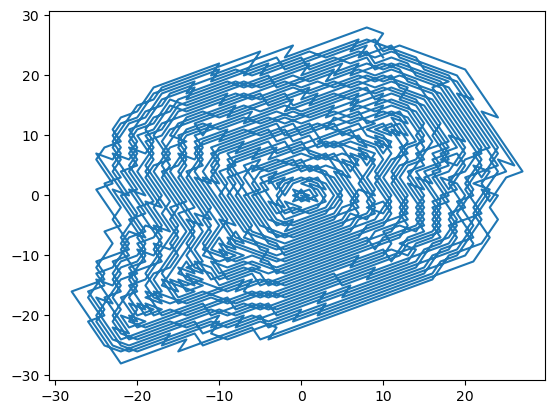

In [23]:
plot(ys, -1 .* xs)

println("Last number = ",  seq[end])